### exercise 1 linear regression 
### multiple linear regression with categorical variables 

In [1]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

In [2]:
df = pd.read_csv(r'.\datasets\Carseats.csv', index_col=0)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
model = smf.ols('Sales ~ Population + Urban + US', data=df)
estimate = model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.563
Date:                Sat, 18 Jun 2022   Prob (F-statistic):            0.00371
Time:                        12:16:20   Log-Likelihood:                -975.56
No. Observations:                 400   AIC:                             1959.
Df Residuals:                     396   BIC:                             1975.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.7262      0.401     16.776   

In [4]:
reduced_model = smf.ols('Sales ~ US', data=df)
reduced_estimate = reduced_model.fit()
print(reduced_estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     12.89
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           0.000372
Time:                        12:16:21   Log-Likelihood:                -975.98
No. Observations:                 400   AIC:                             1956.
Df Residuals:                     398   BIC:                             1964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8230      0.234     29.215      0.0

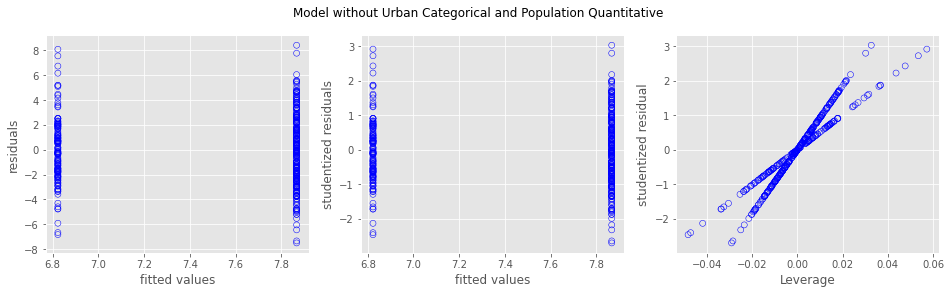

In [5]:
# Obtain the residuals, studentized residuals and the leverages for the reduced model
fitted_values = reduced_estimate.fittedvalues
residuals = reduced_estimate.resid.values
studentized_residuals = OLSInfluence(reduced_estimate).resid_studentized_internal
leverages = OLSInfluence(reduced_estimate).influence

# Plot
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

# Residuals
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
# Studentized Residuals
ax2.scatter(fitted_values, studentized_residuals, facecolors='none', edgecolors='b');
ax2.set_xlabel('fitted values');
ax2.set_ylabel('studentized residuals');
# Leverages
ax3.scatter(leverages, studentized_residuals, facecolors='none', edgecolors='b');
ax3.set_xlabel('Leverage');
ax3.set_ylabel('studentized residual');
plt.suptitle('Model without Urban Categorical and Population Quantitative');

Comment: 
- Neither of the models fit particularly well to the data. In the first model, the $R^2$ term is 0.033, while in the second (the reduced one), it is 0.031.
- The confidence interval for the $\beta_{US}$ is high, which indicates a poor fit to the data.
- Both models are failing to capture variance in the data (i.e. we have high RSS and RSE). 